In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
import sklearn.metrics as metrics

In [2]:
df_org = pd.read_csv("../../../ml_assignments/Car_Purchasing_Data.csv" , encoding="latin-1")

# EDA

In [3]:
# DROPPPED THE LABEL
df = df_org.drop("Car Purchase Amount" , axis=1)

In [4]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer Name     500 non-null    object 
 1   Customer e-mail   500 non-null    object 
 2   Country           500 non-null    object 
 3   Gender            500 non-null    int64  
 4   Age               500 non-null    float64
 5   Annual Salary     500 non-null    float64
 6   Credit Card Debt  500 non-null    float64
 7   Net Worth         500 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 31.4+ KB


### No missing values in the dataset



In [6]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340
min,0.000000,20.000000,20000.000000,100.000000,20000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000


In [7]:
# CONTINOUS VALUED FEATURES:
continous_cols = [cols for cols in df.columns if len(df[cols].unique()) > 10 and df[cols].dtype != "O"] 

In [8]:
continous_cols

['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']

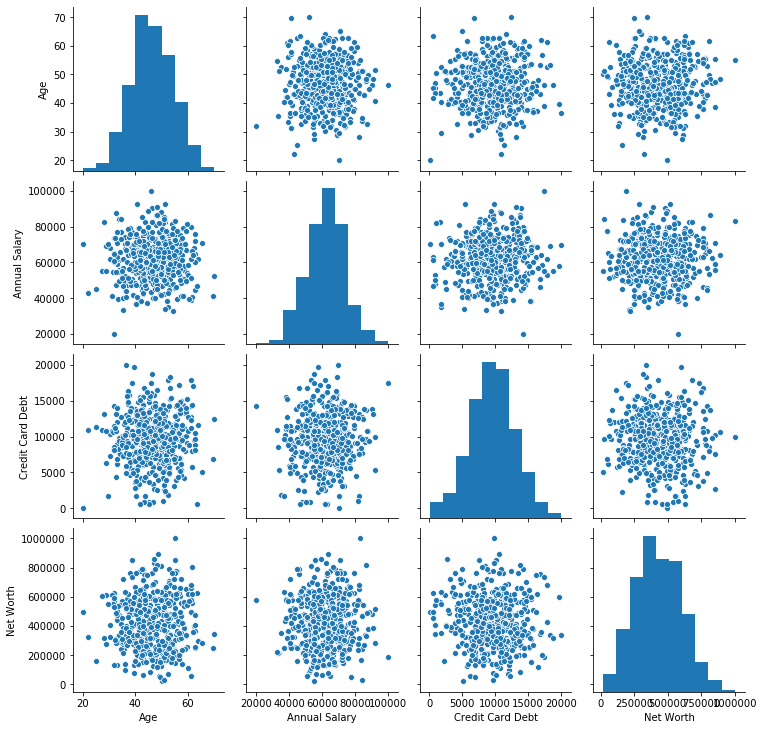

In [9]:
sns.pairplot(df[continous_cols[:4]])

### All the continous features have corelation = 0 , which means all of them are important and cannot be removed!!

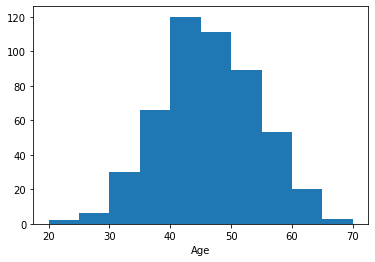

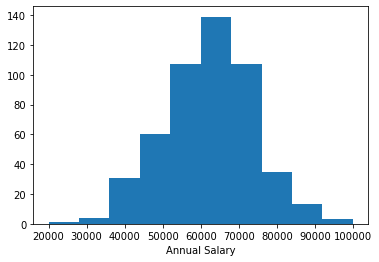

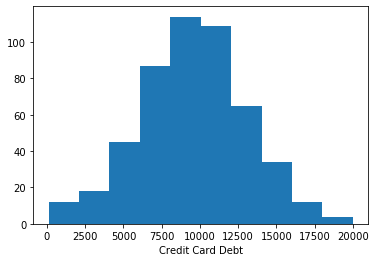

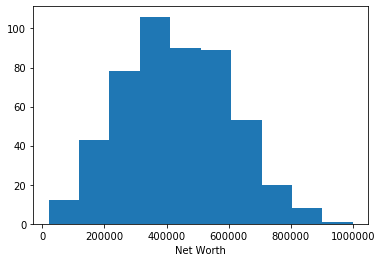

In [10]:
for i in continous_cols:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

In [11]:
# DISCRETE VALUED FEATURES
discrete_cols = [cols for cols in df.columns if len(df[cols].unique()) < 10]

In [12]:
discrete_cols

['Gender']

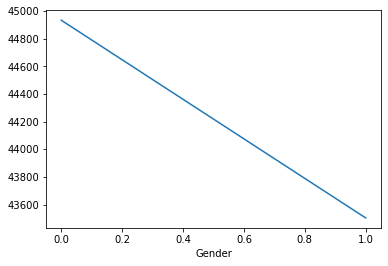

In [13]:
df_org.groupby(discrete_cols)["Car Purchase Amount"].mean().plot()

### Males car purchase amount is higher than that of females

In [14]:
countries = df["Country"].unique()
len(countries)

211

### There are 211 unique countries, for 500 examples. It becomes infeasible for using this feature in the study.

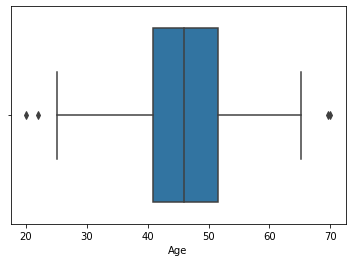

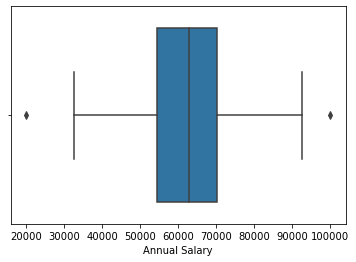

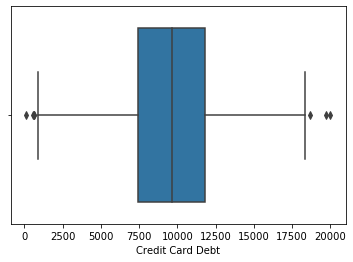

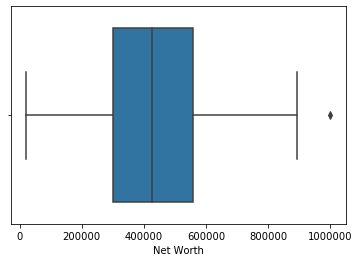

In [15]:
for cols in continous_cols:
    sns.boxplot(df[cols])
    plt.show()

### The outliers are very less in the dataset

# FEATURE ENG.

In [16]:
minmax = MinMaxScaler()

### Minmax scaler was used to scale down the values of numerical features from 0 to 1

In [17]:
df[continous_cols] = minmax.fit_transform(df[continous_cols])

In [18]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,0.437034,0.535151,0.578361,0.223430
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,0.417412,0.583086,0.476028,0.521402
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,0.463058,0.422482,0.555797,0.631089
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,0.765427,0.742125,0.719908,0.539387
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,0.746275,0.496614,0.264257,0.551331


# FEATURE SELECTION

In [19]:
categorical_cols = [cols for cols in df.columns if df[cols].dtype == "O"]

In [20]:
categorical_cols

['Customer Name', 'Customer e-mail', 'Country']

In [21]:
df_train = df.drop(categorical_cols , axis=1)

In [22]:
df_train.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,0.437034,0.535151,0.578361,0.223430
1,0,0.417412,0.583086,0.476028,0.521402
2,1,0.463058,0.422482,0.555797,0.631089
3,1,0.765427,0.742125,0.719908,0.539387
4,1,0.746275,0.496614,0.264257,0.551331


### Name , email , country are not significant. Hence they were removed.

# MODEL SELECTION

In [23]:
df_test = df_org[["Car Purchase Amount"]]

In [24]:
X = df_train.values
y = df_test.values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
selected_features = [c for c in cols if c not in categorical_cols] 

In [27]:
selected_features

['N', 'e', 't', ' ', 'W', 'o', 'r', 't', 'h']

In [28]:
print(f"X_train -- {X_train.shape}")
print(f"y_train -- {y_train.shape}")
print(f"X_test -- {X_test.shape}")
print(f"y_test -- {y_test.shape}")

X_train -- (350, 5)
y_train -- (350, 1)
X_test -- (150, 5)
y_test -- (150, 1)


### MULTIPLE FEATURE LINEAR REGRESSION

In [29]:
sgd = SGDRegressor(max_iter=1000 , learning_rate="adaptive")
# MSE LOSS USED

In [30]:
sgd.fit(X_train ,y_train.flatten())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [31]:
y_pred = sgd.predict(X_test)

In [32]:
metrics.r2_score(y_test , y_pred)

0.9999846512151597

In [33]:
np.sqrt(metrics.mean_squared_error(y_train , sgd.predict(X_train)))

42.725003463675684

In [34]:
np.sqrt(metrics.mean_squared_error(y_test , y_pred))

40.46946226297695

The r-squared error of test set is 0.9999846512151597 

the mean squared error of test set is 40.46946226297695

### ANN

In [35]:
from keras.layers import Dense
from keras.models import Sequential
from keras.losses import mean_squared_error
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError

Using TensorFlow backend.


In [36]:
model = Sequential()
model.add(Dense(128 , activation="relu" , input_shape=(X_train.shape[1] , )))
model.add(Dense(64 , activation="relu"))
model.add(Dense(1 , activation=None))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               768       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss="mean_squared_error" , optimizer="adam")

In [39]:
model.fit(X_train , y_train , epochs=1500 , batch_size=32)

Epoch 1/1500
350/350 [==============================] - 0s 259us/step - loss: 2039392748.9829
Epoch 2/1500
350/350 [==============================] - 0s 40us/step - loss: 2039309470.7200
Epoch 3/1500
350/350 [==============================] - 0s 54us/step - loss: 2039181347.8400
Epoch 4/1500
350/350 [==============================] - 0s 45us/step - loss: 2038965690.5143
Epoch 5/1500
350/350 [==============================] - 0s 43us/step - loss: 2038608890.1486
Epoch 6/1500
350/350 [==============================] - 0s 43us/step - loss: 2038041535.6343
Epoch 7/1500
350/350 [==============================] - 0s 40us/step - loss: 2037202893.5314
Epoch 8/1500
350/350 [==============================] - 0s 51us/step - loss: 2036001006.4457
Epoch 9/1500
350/350 [==============================] - 0s 42us/step - loss: 2034349742.0800
Epoch 10/1500
350/350 [==============================] - 0s 43us/step - loss: 2032171164.5257
Epoch 11/1500
350/350 [==============================] - 0s 37us/ste

350/350 [==============================] - 0s 28us/step - loss: 101016534.5829
Epoch 89/1500
350/350 [==============================] - 0s 29us/step - loss: 99492210.8343
Epoch 90/1500
350/350 [==============================] - 0s 26us/step - loss: 98019292.8457
Epoch 91/1500
350/350 [==============================] - 0s 34us/step - loss: 96806396.3429
Epoch 92/1500
350/350 [==============================] - 0s 28us/step - loss: 95726765.3029
Epoch 93/1500
350/350 [==============================] - 0s 28us/step - loss: 94688400.0000
Epoch 94/1500
350/350 [==============================] - 0s 31us/step - loss: 93919945.9657
Epoch 95/1500
350/350 [==============================] - 0s 28us/step - loss: 93010775.2686
Epoch 96/1500
350/350 [==============================] - 0s 28us/step - loss: 92307533.2114
Epoch 97/1500
350/350 [==============================] - 0s 31us/step - loss: 91617713.2800
Epoch 98/1500
350/350 [==============================] - 0s 28us/step - loss: 91044438.4914
E

350/350 [==============================] - 0s 31us/step - loss: 60044694.4229
Epoch 177/1500
350/350 [==============================] - 0s 28us/step - loss: 59748547.2457
Epoch 178/1500
350/350 [==============================] - 0s 28us/step - loss: 59428480.2743
Epoch 179/1500
350/350 [==============================] - 0s 31us/step - loss: 59130808.1600
Epoch 180/1500
350/350 [==============================] - 0s 29us/step - loss: 58834917.6914
Epoch 181/1500
350/350 [==============================] - 0s 28us/step - loss: 58565681.2343
Epoch 182/1500
350/350 [==============================] - 0s 28us/step - loss: 58256901.5086
Epoch 183/1500
350/350 [==============================] - 0s 31us/step - loss: 57962762.5143
Epoch 184/1500
350/350 [==============================] - 0s 29us/step - loss: 57661115.4514
Epoch 185/1500
350/350 [==============================] - 0s 28us/step - loss: 57381553.6457
Epoch 186/1500
350/350 [==============================] - 0s 28us/step - loss: 570914

350/350 [==============================] - 0s 34us/step - loss: 40202092.7086
Epoch 264/1500
350/350 [==============================] - ETA: 0s - loss: 73992320.00 - 0s 31us/step - loss: 40032413.8171
Epoch 265/1500
350/350 [==============================] - 0s 29us/step - loss: 39873305.3486
Epoch 266/1500
350/350 [==============================] - 0s 29us/step - loss: 39725887.9771
Epoch 267/1500
350/350 [==============================] - 0s 31us/step - loss: 39557136.2400
Epoch 268/1500
350/350 [==============================] - 0s 31us/step - loss: 39386763.2229
Epoch 269/1500
350/350 [==============================] - 0s 31us/step - loss: 39230930.6286
Epoch 270/1500
350/350 [==============================] - 0s 31us/step - loss: 39082358.9486
Epoch 271/1500
350/350 [==============================] - 0s 31us/step - loss: 38926202.2400
Epoch 272/1500
350/350 [==============================] - 0s 34us/step - loss: 38755202.3771
Epoch 273/1500
350/350 [==============================]

350/350 [==============================] - 0s 34us/step - loss: 28668057.8514
Epoch 351/1500
350/350 [==============================] - 0s 31us/step - loss: 28547432.3771
Epoch 352/1500
350/350 [==============================] - 0s 31us/step - loss: 28434010.8114
Epoch 353/1500
350/350 [==============================] - 0s 31us/step - loss: 28320878.0800
Epoch 354/1500
350/350 [==============================] - 0s 31us/step - loss: 28207250.0800
Epoch 355/1500
350/350 [==============================] - 0s 34us/step - loss: 28185406.8229
Epoch 356/1500
350/350 [==============================] - 0s 31us/step - loss: 27991572.2514
Epoch 357/1500
350/350 [==============================] - 0s 31us/step - loss: 27875258.6857
Epoch 358/1500
350/350 [==============================] - 0s 32us/step - loss: 27763582.9029
Epoch 359/1500
350/350 [==============================] - 0s 31us/step - loss: 27645844.1143
Epoch 360/1500
350/350 [==============================] - 0s 31us/step - loss: 275509

350/350 [==============================] - 0s 31us/step - loss: 19265631.4171
Epoch 438/1500
350/350 [==============================] - 0s 34us/step - loss: 19170989.7257
Epoch 439/1500
350/350 [==============================] - 0s 34us/step - loss: 19059040.4914
Epoch 440/1500
350/350 [==============================] - 0s 31us/step - loss: 18958691.3143
Epoch 441/1500
350/350 [==============================] - 0s 28us/step - loss: 18859973.9086
Epoch 442/1500
350/350 [==============================] - 0s 31us/step - loss: 18753590.8343
Epoch 443/1500
350/350 [==============================] - 0s 31us/step - loss: 18648175.7714
Epoch 444/1500
350/350 [==============================] - 0s 28us/step - loss: 18570672.2514
Epoch 445/1500
350/350 [==============================] - 0s 34us/step - loss: 18447358.5486
Epoch 446/1500
350/350 [==============================] - 0s 31us/step - loss: 18346891.9486
Epoch 447/1500
350/350 [==============================] - 0s 34us/step - loss: 182479

350/350 [==============================] - 0s 31us/step - loss: 10932546.1257
Epoch 526/1500
350/350 [==============================] - 0s 28us/step - loss: 10846844.9743
Epoch 527/1500
350/350 [==============================] - 0s 29us/step - loss: 10769314.8000
Epoch 528/1500
350/350 [==============================] - 0s 29us/step - loss: 10691581.6629
Epoch 529/1500
350/350 [==============================] - 0s 28us/step - loss: 10610745.2457
Epoch 530/1500
350/350 [==============================] - 0s 31us/step - loss: 10522185.8371
Epoch 531/1500
350/350 [==============================] - 0s 31us/step - loss: 10448334.3229
Epoch 532/1500
350/350 [==============================] - 0s 31us/step - loss: 10367050.1771
Epoch 533/1500
350/350 [==============================] - 0s 31us/step - loss: 10287441.9657
Epoch 534/1500
350/350 [==============================] - 0s 28us/step - loss: 10197939.5171
Epoch 535/1500
350/350 [==============================] - 0s 30us/step - loss: 101223

350/350 [==============================] - 0s 34us/step - loss: 4910881.8857
Epoch 614/1500
350/350 [==============================] - 0s 31us/step - loss: 4859128.1657
Epoch 615/1500
350/350 [==============================] - 0s 31us/step - loss: 4808430.6957
Epoch 616/1500
350/350 [==============================] - 0s 31us/step - loss: 4754219.8829
Epoch 617/1500
350/350 [==============================] - ETA: 0s - loss: 3620971.000 - 0s 34us/step - loss: 4699585.4686
Epoch 618/1500
350/350 [==============================] - 0s 31us/step - loss: 4649296.9686
Epoch 619/1500
350/350 [==============================] - 0s 31us/step - loss: 4603741.0486
Epoch 620/1500
350/350 [==============================] - 0s 31us/step - loss: 4555059.8400
Epoch 621/1500
350/350 [==============================] - 0s 31us/step - loss: 4495929.8114
Epoch 622/1500
350/350 [==============================] - 0s 34us/step - loss: 4450816.1286
Epoch 623/1500
350/350 [==============================] - 0s 31us

350/350 [==============================] - 0s 31us/step - loss: 1489484.8371
Epoch 702/1500
350/350 [==============================] - 0s 31us/step - loss: 1460974.5164
Epoch 703/1500
350/350 [==============================] - 0s 34us/step - loss: 1437295.4550
Epoch 704/1500
350/350 [==============================] - 0s 31us/step - loss: 1411381.5250
Epoch 705/1500
350/350 [==============================] - 0s 34us/step - loss: 1388616.3675
Epoch 706/1500
350/350 [==============================] - ETA: 0s - loss: 1012658.125 - 0s 31us/step - loss: 1363735.8700
Epoch 707/1500
350/350 [==============================] - 0s 34us/step - loss: 1337943.1564
Epoch 708/1500
350/350 [==============================] - 0s 31us/step - loss: 1316850.5821
Epoch 709/1500
350/350 [==============================] - 0s 31us/step - loss: 1293982.3829
Epoch 710/1500
350/350 [==============================] - 0s 31us/step - loss: 1271226.9386
Epoch 711/1500
350/350 [==============================] - 0s 34us

350/350 [==============================] - 0s 35us/step - loss: 191009.3549
Epoch 791/1500
350/350 [==============================] - 0s 34us/step - loss: 185271.1214
Epoch 792/1500
350/350 [==============================] - 0s 31us/step - loss: 179734.4710
Epoch 793/1500
350/350 [==============================] - 0s 31us/step - loss: 174892.9023
Epoch 794/1500
350/350 [==============================] - 0s 31us/step - loss: 168641.0292
Epoch 795/1500
350/350 [==============================] - 0s 31us/step - loss: 163689.3805
Epoch 796/1500
350/350 [==============================] - 0s 31us/step - loss: 159092.1954
Epoch 797/1500
350/350 [==============================] - 0s 34us/step - loss: 154984.7430
Epoch 798/1500
350/350 [==============================] - 0s 31us/step - loss: 149164.4642
Epoch 799/1500
350/350 [==============================] - 0s 28us/step - loss: 145336.8233
Epoch 800/1500
350/350 [==============================] - 0s 31us/step - loss: 139217.0433
Epoch 801/1500

350/350 [==============================] - 0s 31us/step - loss: 4294.8982
Epoch 882/1500
350/350 [==============================] - 0s 31us/step - loss: 4076.1478
Epoch 883/1500
350/350 [==============================] - 0s 31us/step - loss: 3863.8153
Epoch 884/1500
350/350 [==============================] - 0s 31us/step - loss: 3661.6875
Epoch 885/1500
350/350 [==============================] - 0s 31us/step - loss: 3432.7962
Epoch 886/1500
350/350 [==============================] - 0s 28us/step - loss: 3265.6740
Epoch 887/1500
350/350 [==============================] - 0s 28us/step - loss: 3094.6625
Epoch 888/1500
350/350 [==============================] - 0s 31us/step - loss: 2911.6424
Epoch 889/1500
350/350 [==============================] - 0s 34us/step - loss: 2751.9547
Epoch 890/1500
350/350 [==============================] - 0s 31us/step - loss: 2589.1276
Epoch 891/1500
350/350 [==============================] - 0s 31us/step - loss: 2457.8860
Epoch 892/1500
350/350 [============

350/350 [==============================] - 0s 32us/step - loss: 7.0992
Epoch 975/1500
350/350 [==============================] - 0s 31us/step - loss: 6.6257
Epoch 976/1500
350/350 [==============================] - 0s 34us/step - loss: 6.2322
Epoch 977/1500
350/350 [==============================] - 0s 34us/step - loss: 5.8667
Epoch 978/1500
350/350 [==============================] - 0s 31us/step - loss: 5.5484
Epoch 979/1500
350/350 [==============================] - 0s 29us/step - loss: 5.2617
Epoch 980/1500
350/350 [==============================] - 0s 31us/step - loss: 4.9845
Epoch 981/1500
350/350 [==============================] - 0s 34us/step - loss: 4.7144
Epoch 982/1500
350/350 [==============================] - 0s 34us/step - loss: 4.4553
Epoch 983/1500
350/350 [==============================] - 0s 34us/step - loss: 4.2611
Epoch 984/1500
350/350 [==============================] - 0s 34us/step - loss: 4.0665
Epoch 985/1500
350/350 [==============================] - 0s 54us/ste

350/350 [==============================] - 0s 31us/step - loss: 2.3530
Epoch 1069/1500
350/350 [==============================] - 0s 31us/step - loss: 2.2533
Epoch 1070/1500
350/350 [==============================] - 0s 31us/step - loss: 2.2643
Epoch 1071/1500
350/350 [==============================] - 0s 31us/step - loss: 2.3507
Epoch 1072/1500
350/350 [==============================] - 0s 31us/step - loss: 2.4550
Epoch 1073/1500
350/350 [==============================] - 0s 31us/step - loss: 2.3606
Epoch 1074/1500
350/350 [==============================] - 0s 31us/step - loss: 2.3227
Epoch 1075/1500
350/350 [==============================] - 0s 31us/step - loss: 2.2804
Epoch 1076/1500
350/350 [==============================] - 0s 31us/step - loss: 2.2480
Epoch 1077/1500
350/350 [==============================] - 0s 31us/step - loss: 2.2727
Epoch 1078/1500
350/350 [==============================] - 0s 29us/step - loss: 2.2710
Epoch 1079/1500
350/350 [==============================] - 

350/350 [==============================] - 0s 31us/step - loss: 2.2814
Epoch 1163/1500
350/350 [==============================] - 0s 31us/step - loss: 2.3485
Epoch 1164/1500
350/350 [==============================] - 0s 31us/step - loss: 2.4840
Epoch 1165/1500
350/350 [==============================] - 0s 31us/step - loss: 2.4384
Epoch 1166/1500
350/350 [==============================] - 0s 31us/step - loss: 2.2974
Epoch 1167/1500
350/350 [==============================] - 0s 31us/step - loss: 2.2640
Epoch 1168/1500
350/350 [==============================] - 0s 31us/step - loss: 2.2777
Epoch 1169/1500
350/350 [==============================] - 0s 32us/step - loss: 2.2727
Epoch 1170/1500
350/350 [==============================] - 0s 28us/step - loss: 2.4511
Epoch 1171/1500
350/350 [==============================] - 0s 28us/step - loss: 2.2888
Epoch 1172/1500
350/350 [==============================] - 0s 28us/step - loss: 2.2594
Epoch 1173/1500
350/350 [==============================] - 

350/350 [==============================] - 0s 31us/step - loss: 2.3144
Epoch 1257/1500
350/350 [==============================] - 0s 31us/step - loss: 2.3312
Epoch 1258/1500
350/350 [==============================] - 0s 28us/step - loss: 2.5022
Epoch 1259/1500
350/350 [==============================] - 0s 31us/step - loss: 2.5207
Epoch 1260/1500
350/350 [==============================] - 0s 31us/step - loss: 2.4325
Epoch 1261/1500
350/350 [==============================] - 0s 31us/step - loss: 2.2839
Epoch 1262/1500
350/350 [==============================] - 0s 31us/step - loss: 2.3533
Epoch 1263/1500
350/350 [==============================] - 0s 28us/step - loss: 2.2734
Epoch 1264/1500
350/350 [==============================] - 0s 31us/step - loss: 2.3510
Epoch 1265/1500
350/350 [==============================] - 0s 31us/step - loss: 2.3303
Epoch 1266/1500
350/350 [==============================] - 0s 34us/step - loss: 2.3252
Epoch 1267/1500
350/350 [==============================] - 

350/350 [==============================] - 0s 31us/step - loss: 2.6205
Epoch 1351/1500
350/350 [==============================] - 0s 31us/step - loss: 2.5929
Epoch 1352/1500
350/350 [==============================] - 0s 31us/step - loss: 2.4859
Epoch 1353/1500
350/350 [==============================] - 0s 31us/step - loss: 2.9521
Epoch 1354/1500
350/350 [==============================] - 0s 30us/step - loss: 2.8808
Epoch 1355/1500
350/350 [==============================] - 0s 31us/step - loss: 2.4393
Epoch 1356/1500
350/350 [==============================] - 0s 31us/step - loss: 2.6919
Epoch 1357/1500
350/350 [==============================] - 0s 28us/step - loss: 2.3036
Epoch 1358/1500
350/350 [==============================] - 0s 31us/step - loss: 2.4119
Epoch 1359/1500
350/350 [==============================] - 0s 31us/step - loss: 2.4982
Epoch 1360/1500
350/350 [==============================] - 0s 29us/step - loss: 2.4307
Epoch 1361/1500
350/350 [==============================] - 

350/350 [==============================] - 0s 31us/step - loss: 3.1987
Epoch 1445/1500
350/350 [==============================] - 0s 31us/step - loss: 3.9058
Epoch 1446/1500
350/350 [==============================] - 0s 31us/step - loss: 3.4633
Epoch 1447/1500
350/350 [==============================] - 0s 31us/step - loss: 2.9223
Epoch 1448/1500
350/350 [==============================] - 0s 31us/step - loss: 3.9456
Epoch 1449/1500
350/350 [==============================] - 0s 31us/step - loss: 3.4439
Epoch 1450/1500
350/350 [==============================] - 0s 31us/step - loss: 3.9136
Epoch 1451/1500
350/350 [==============================] - 0s 31us/step - loss: 2.7455
Epoch 1452/1500
350/350 [==============================] - 0s 31us/step - loss: 2.3925
Epoch 1453/1500
350/350 [==============================] - 0s 31us/step - loss: 2.4804
Epoch 1454/1500
350/350 [==============================] - 0s 31us/step - loss: 2.5974
Epoch 1455/1500
350/350 [==============================] - 

In [40]:
y_pred_test = model.predict(X_test)

In [41]:
metrics.r2_score(y_test , y_pred_test)

0.9999999810564965

In [44]:
np.sqrt(metrics.mean_squared_error(y_train , model.predict(X_train)))

1.504365006818328

In [46]:
np.sqrt(metrics.mean_squared_error(y_test , y_pred_test))

1.4217413243075179

The r-squared error of test set is 0.9999999810564965

the mean squared error of test set is 1.4217413243075179

### The ann performs better than the Linear regression 